In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import decomposition
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics.cluster import homogeneity_score
from sklearn.manifold.t_sne import TSNE
from sklearn.decomposition import TruncatedSVD

In [4]:
np.random.seed(0)
X_train = []
y_train = []
k=0
for i in range(5):
    k += 10*i
    for j in range(500):
        X_train.append([2*np.random.rand() for _ in range(10)])
        X_train[-1][2*i] = np.random.randint(3, 8+j)
        X_train[-1][2*i+1] = np.random.randint(3, 8+j)
        y_train.append(i)

X_train = np.array(X_train).T
y_train = np.array(y_train)

In [5]:
def clustering(H):
    labels_ = []
    for index in range(H.shape[1]):

        col = H[:,index]

        cluster = np.argmax(col)

        labels_.append(cluster)
    
    return labels_

# Viewing synthetic dataset

In [6]:
X_train.T.shape

(2500, 10)

In [7]:
tsne = TSNE(n_components=2, perplexity=10.0, random_state=2)
proj_x = tsne.fit_transform(X_train.T)

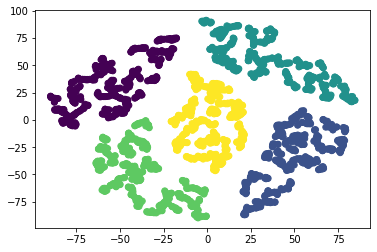

In [8]:
plt.scatter(proj_x[:, 0], proj_x[:, 1], c=y_train)

# KMeans

In [9]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(X_train.T)
clusters_kmeans = kmeans.predict(X_train.T)

Homogeneity Score: 0.4677341913379719


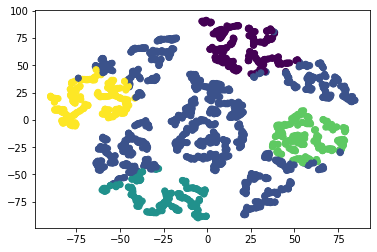

In [10]:
plt.scatter(proj_x[:, 0], proj_x[:, 1], c=clusters_kmeans)
print('Homogeneity Score:', homogeneity_score(y_train, clusters_kmeans))

# TSVD

In [11]:
tsvd = TruncatedSVD(n_components=5)
a = tsvd.fit_transform(X_train.T)

In [12]:
labels_ = clustering(a.T)

Homogeneity Score: 0.9647802804942185


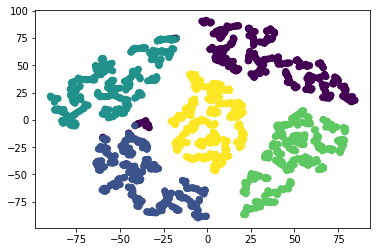

In [15]:
plt.scatter(proj_x[:, 0], proj_x[:, 1], c=labels_)
print('Homogeneity Score:', homogeneity_score(y_train, labels_))